In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Directory containing CSV files
directory = r"C:\Users\Namrata Patil\Desktop\620 DMPA\NH Data\Data"

# List of CSV files
csv_files = ['2015_CostReport.csv', 
             '2016_CostReport.csv', 
             '2017_CostReport.csv', 
             '2018_CostReport.csv', 
             '2019_CostReport.csv', 
             '2020_CostReport.csv', 
             '2021_CostReport.csv']

# Initialize an empty dictionary to store DataFrames
dfs = {}

# Read each CSV file into a DataFrame and store them in the dictionary
for file in csv_files:
    file_path = os.path.join(directory, file)
    if os.path.exists(file_path):  # Check if the file exists
        dfs[file] = pd.read_csv(file_path, low_memory = False)
    else:
        print(f"File '{file}' not found.")

# Accessing the DataFrames
for file, df in dfs.items():
    print(f"DataFrame from file '{file}':")

DataFrame from file '2015_CostReport.csv':
DataFrame from file '2016_CostReport.csv':
DataFrame from file '2017_CostReport.csv':
DataFrame from file '2018_CostReport.csv':
DataFrame from file '2019_CostReport.csv':
DataFrame from file '2020_CostReport.csv':
DataFrame from file '2021_CostReport.csv':


In [4]:
# Merge the files

merged_df = pd.concat(dfs.values(), ignore_index=True)
print(merged_df.head())

   rpt_rec_num  Provider_CCN                         Facility_Name  \
0      1089712      495134.0  RIDGECREST MANOR NURSING & REHAB CTR   
1      1091410       75417.0        REGENCY HEIGHTS OF NORWICH LLC   
2      1093283      165252.0            WESTVIEW ACRES CARE CENTER   
3      1095547      225497.0          VERO HEALTH & REHAB  PARKWAY   
4      1095966      265161.0         WILSONS CREEK NURSING & REHAB   

         Street_Address          City State_Code Zip_Code      County  \
0  157 ROSS-CARTER BLVD      DUFFIELD         VA    24244       SCOTT   
1      60 CROUCH AVENUE       NORWICH         CT     6360  NEW LONDON   
2       203 SW LORRAINE          LEON         IA    50144     DECATUR   
3      1190 VFW PARKWAY  WEST ROXBURY         MA     2132     SUFFOLK   
4   3403 WEST MT VERNON   SPRINGFIELD         MO    65802      GREENE   

  Medicare_CBSA_Number Rural_versus_Urban  ... Total Other Income  \
0                28700                  U  ...                NaN   
1 

In [5]:
merged_df.shape

(197481, 196)

In [6]:
for col in merged_df.columns:
    print(col)

rpt_rec_num
Provider_CCN
Facility_Name
Street_Address
City
State_Code
Zip_Code
County
Medicare_CBSA_Number
Rural_versus_Urban
Fiscal_Year_Begin_Date
Fiscal_Year_End_Date
Type_of_Control
Accounts_Receivable
Accounts_payable
Buildings
Cash_on_hand_and_in_banks
General_fund_balance
Gross_Revenue
Inpatient_PPS_Amount
Inpatient_Revenue
Less_Total_Operating_Expense
Less_discounts_on_patients
Major_movable_equipment
Net_Income
Net_Income_from_patients
Net_Patient_Revenue
Number_of_Beds
Other_Assets
Other_current_liabilities
Overhead_Non_Salary_Costs
SNF_Admissions_Other
SNF_Admissions_Title_XIX
SNF_Admissions_Title_XVIII
SNF_Admissions_Total
SNF_Average_Length_of_stay_Tot
SNF_Average_Length_stay_XIX
SNF_Average_Length_stay_XVIII
SNF_Days_Other
SNF_Days_Title_XIX
SNF_Days_Title_XVIII
SNF_Days_Total
SNF_Discharges_Title_Other
SNF_Discharges_Title_XIX
SNF_Discharges_Title_XVIII
SNF_Discharges_Total
SNF_Number_of_beds
SNF_bed_Days_Available
Salaries_wages_and_fees_payable
Total_Assets
Total_Bed_D

In [7]:
merged_df_copy = merged_df

In [8]:
merged_df_copy[merged_df_copy['Net Income'].isna()==1].shape

(182776, 196)

In [9]:
merged_df_copy[merged_df_copy['Net_Income'].isna()==1].shape

(123088, 196)

In [10]:
merged_df_copy[merged_df_copy['Fiscal_Year_Begin_Date'].isna()==1].shape

(122879, 196)

In [11]:
merged_df_copy[merged_df_copy['Fiscal Year Begin Date'].isna()==1].shape

(182732, 196)

In [12]:
merged_df_copy[merged_df_copy['Fiscal Year End Date'].isna()==1].shape

(153137, 196)

In [14]:

# Convert fiscal year columns to datetime format if needed
merged_df_copy['Fiscal_Year_Begin_Date'] = pd.to_datetime(merged_df_copy['Fiscal_Year_Begin_Date'])
merged_df_copy['Fiscal Year Begin Date'] = pd.to_datetime(merged_df_copy['Fiscal Year Begin Date'])

# Merge the DataFrames on the primary key column
merged_df = pd.merge(merged_df_copy, merged_df_copy, on='rpt_rec_num', how='inner')

# Store the merged fiscal year information in a new column
merged_df['Combined Fiscal Year Begin Date'] = merged_df['Fiscal_Year_Begin_Date'].fillna(merged_df['Fiscal Year Begin Date'])

print(merged_df['Combined Fiscal Year Begin Date'])

KeyError: 'Fiscal_Year_Begin_Date'

In [16]:
# Assuming 'merged_df_copy' is your DataFrame containing 'rpt_num', 'Net Income', and 'Net_Income' columns

# Merge the DataFrame on 'rpt_num' as primary key
merged_df_copy = pd.merge(merged_df_copy, merged_df_copy[['rpt_rec_num', 'Net Income', 'Net_Income']], on='rpt_rec_num', how='left')

# Fill missing values in 'Net Income' column with values from 'Net_Income' column
merged_df_copy['Total Net Income'] = merged_df_copy['Net Income'].fillna(merged_df_copy['Net_Income'])

# Drop the original columns if needed
# merged_df_copy.drop(columns=['Net Income', 'Net_Income'], inplace=True)

print(merged_df_copy.head())


KeyError: 'Net Income'

In [13]:
merged_df_copy['Total Net Income'] = merged_df_copy['Net Income'].fillna(merged_df_copy['Net_Income'])

merged_df_copy['Facility Name'] = merged_df_copy['Facility Name'].fillna(merged_df_copy['Facility_Name'])

merged_df_copy['State Code'] = merged_df_copy['State Code'].fillna(merged_df_copy['State_Code'])

merged_df_copy['Medicare CBSA Number'] = merged_df_copy['Medicare CBSA Number'].fillna(merged_df_copy['Medicare_CBSA_Number'])

merged_df_copy['Gross Revenue'] = merged_df_copy['Gross Revenue'].fillna(merged_df_copy['Gross_Revenue'])

merged_df_copy['Number of Beds'] = merged_df_copy['Number of Beds'].fillna(merged_df_copy['Number_of_Beds'])

merged_df_copy['Total Costs'] = merged_df_copy['Total Costs'].fillna(merged_df_copy['Total_Costs'])

merged_df_copy['Inpatient Revenue'] = merged_df_copy['Inpatient Revenue'].fillna(merged_df_copy['Inpatient_Revenue'])

merged_df_copy['SNF Admissions Total'] = merged_df_copy['SNF Admissions Total'].fillna(merged_df_copy['SNF_Admissions_Total'])

merged_df_copy['SNF Average Length of Stay Total'] = merged_df_copy['SNF Average Length of Stay Total'].fillna(merged_df_copy['SNF_Average_Length_of_stay_Tot'])

merged_df_copy['Total Assets'] = merged_df_copy['Total Assets'].fillna(merged_df_copy['Total_Assets'])

merged_df_copy['Total RUG Days'] = merged_df_copy['Total RUG Days'].fillna(merged_df_copy['Total_RUG_Days'])



In [14]:
selectedColumns = ['rpt_rec_num','Facility Name','City','State Code','County','Combined Fiscal Year Begin Date',
                   'Medicare CBSA Number','Combined Fiscal Year End Date','Gross Revenue','Total Net Income',
                   'Number of Beds','Total Costs', 'Total Assets','Inpatient Revenue','Outpatient Revenue',
                   'Total_General_Inpatient_Revenue','SNF Admissions Total','SNF Average Length of Stay Total',
                   'Total RUG Days']

new_df = merged_df_copy[selectedColumns]
new_df

rpt_rec_num                         Facility Name          City  \
0           1089712  RIDGECREST MANOR NURSING & REHAB CTR      DUFFIELD   
1           1091410        REGENCY HEIGHTS OF NORWICH LLC       NORWICH   
2           1093283            WESTVIEW ACRES CARE CENTER          LEON   
3           1095547          VERO HEALTH & REHAB  PARKWAY  WEST ROXBURY   
4           1095966         WILSONS CREEK NURSING & REHAB   SPRINGFIELD   
...             ...                                   ...           ...   
197476      1365869             KIN ON HEALTH CARE CENTER       SEATTLE   
197477      1365888          LCS-WP  LLC DBA WALNUT PLACE        DALLAS   
197478      1365889  STRATFORD HOSPITAL DISTRICT DBA ARBO    SAN ANGELO   
197479      1365890      WINDSOR NRS & REHAB CTR OF DUVAL        AUSTIN   
197480      1365892                 BETHANY SENIOR LIVING   PORT LAVACA   

       State Code      County Combined Fiscal Year Begin Date  \
0              VA       SCOTT                      2014-11-01   
1              CT  NEW LONDON                      2014-10-01   
2              IA     DECATUR                      2014-10-01   
3              MA     SUFFOLK                      2014-11-01   
4              MO      GREENE                      2014-12-01   
...           ...         ...                             ...   
197476         WA        KING                             NaT   
197477         TX      DALLAS                             NaT   
197478         TX   TOM GREEN                             NaT   
197479         TX      TRAVIS                             NaT   
197480         TX     CALHOUN                             NaT   

       Medicare CBSA Number Combined Fiscal Year End Date  Gross Revenue  \
0                     28700           2014-12-31 00:00:00      1800296.0   
1                     35980           2014-12-14 00:00:00      2843541.0   
2                     99916           2014-12-31 00:00:00       613243.0   
3                     14454           2014-12-31 00:00:00      1935277.0   
4                     44180           2014-12-31 00:00:00       818175.0   
...                     ...                           ...            ...   
197476              42644.0                    12/31/2021      9351892.0   
197477              19124.0                    12/31/2021     14843070.0   
197478              41660.0                    12/31/2021      9009085.0   
197479              12420.0                    12/31/2021     12738362.0   
197480              99945.0                    12/31/2021      9991720.0   

        Total Net Income  Number of Beds  Total Costs  Total Assets  \
0               311430.0           120.0     211585.0      765020.0   
1              -588469.0           114.0     207903.0     1687456.0   
2               -47859.0            60.0      22920.0      244239.0   
3               -63638.0           141.0     158386.0     1830758.0   
4                -1613.0           172.0      56556.0      807209.0   
...                  ...             ...          ...           ...   
197476               NaN           100.0     357017.0    10935363.0   
197477               NaN           388.0    2312210.0    19277778.0   
197478               NaN           126.0    1111339.0    23011475.0   
197479               NaN           206.0    1250246.0     4662403.0   
197480               NaN           130.0    1493029.0     1544074.0   

        Inpatient Revenue  Outpatient Revenue  \
0               1800296.0                 NaN   
1               2843541.0                 NaN   
2                613243.0                 NaN   
3               1935277.0                 NaN   
4                818175.0                 NaN   
...                   ...                 ...   
197476          9351892.0                 NaN   
197477         14843070.0                 NaN   
197478          8599523.0                 NaN   
197479         12738362.0                 NaN   
197480          99917

In [15]:
new_df.isna().sum()

rpt_rec_num                              0
Facility Name                            0
City                                     0
State Code                               0
County                                   2
Combined Fiscal Year Begin Date     108130
Medicare CBSA Number                  4026
Combined Fiscal Year End Date        78535
Gross Revenue                         4348
Total Net Income                    108383
Number of Beds                        4560
Total Costs                           4063
Total Assets                          5267
Inpatient Revenue                     4350
Outpatient Revenue                  196280
Total_General_Inpatient_Revenue      48671
SNF Admissions Total                  5612
SNF Average Length of Stay Total      4474
Total RUG Days                       49417
dtype: int64

In [16]:
new_df = new_df.drop(columns=['Outpatient Revenue'])

# Creating 'Operating Margin' Column

In [17]:
# Formula for calculating Operating Margin

new_df['Operating Margin (%)'] = (new_df['Inpatient Revenue'] / new_df['Gross Revenue']) * 100
new_df['Operating Margin (%)'].head(15)

0     100.0
1     100.0
2     100.0
3     100.0
4     100.0
5     100.0
6     100.0
7     100.0
8     100.0
9     100.0
10    100.0
11    100.0
12    100.0
13    100.0
14    100.0
Name: Operating Margin (%), dtype: float64

In [18]:
new_df[['Inpatient Revenue', 'Gross Revenue','Operating Margin (%)']].head(20)

Inpatient Revenue  Gross Revenue  Operating Margin (%)
0           1800296.0      1800296.0            100.000000
1           2843541.0      2843541.0            100.000000
2            613243.0       613243.0            100.000000
3           1935277.0      1935277.0            100.000000
4            818175.0       818175.0            100.000000
5            539859.0       539859.0            100.000000
6            529513.0       529513.0            100.000000
7            132584.0       132584.0            100.000000
8            676254.0       676254.0            100.000000
9            935500.0       935500.0            100.000000
10           975773.0       975773.0            100.000000
11          1489672.0      1489672.0            100.000000
12           926701.0       926701.0            100.000000
13           673546.0       673546.0            100.000000
14          4500933.0      4500933.0            100.000000
15          2756436.0      2756436.0            100.000000
16          1603543.0      1608190.0             99.711042
17                NaN            NaN                   NaN
18          1079403.0      1079403.0            100.000000
19           549519.0       549519.0            100.000000

# Creating 'Return on Assets' Column

In [19]:
# Formula for calculating ROA (%)

new_df['ROA (%)'] = (new_df['Total Net Income'] / new_df['Total Assets']) * 100

In [20]:
new_df[['Total Net Income', 'Total Assets','ROA (%)']].head()

Total Net Income  Total Assets    ROA (%)
0          311430.0      765020.0  40.708740
1         -588469.0     1687456.0 -34.873146
2          -47859.0      244239.0 -19.595151
3          -63638.0     1830758.0  -3.476047
4           -1613.0      807209.0  -0.199824

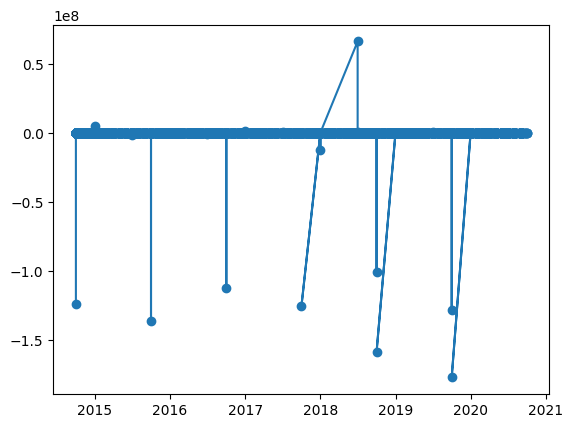

In [21]:
plt.plot(new_df['Combined Fiscal Year Begin Date'], new_df['ROA (%)'], marker='o', linestyle='-')

In [22]:
file_path = r'C:\Users\Namrata Patil\Desktop\620 DMPA\Jupyter\new_df.csv'
new_df.to_csv(file_path, index=False)
print(f"CSV file saved successfully at: {file_path}")

CSV file saved successfully at: C:\Users\Namrata Patil\Desktop\620 DMPA\Jupyter\new_df.csv


In [23]:
new_df['ROA (%)'].describe()

count    8.847500e+04
mean    -1.134689e+04
std      1.301532e+06
min     -1.771191e+08
25%     -8.169137e+00
50%      1.813989e+00
75%      1.550589e+01
max      6.602100e+07
Name: ROA (%), dtype: float64